In [40]:
from tensorflow import keras
L = keras.layers
from vaes import VAE, decaying, cos_decaying
from utils import evaluate

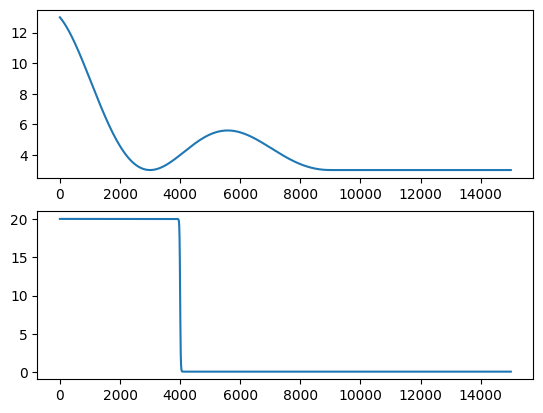

In [50]:
import numpy as np
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
x = np.linspace(0, 15000, 10000)
axs[0].plot(x,cos_decaying(10, 3, 3000, 0.7, flatten_after_nth=2)(x))
axs[1].plot(x,decaying(4000, 20, .1, -0.1)(x))

In [42]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255

In [43]:
def encoding_stack():
   return keras.Sequential(
        [
            L.Conv2D(32, 5, activation='leaky_relu'),
            L.Conv2D(32, 5, activation='leaky_relu'),
            L.MaxPooling2D(),
            L.Conv2D(32, 5, activation='leaky_relu'),
            L.Flatten(),
        ],
        name='encoder_conv_stack'
    )
def decoding_stack():
  return keras.Sequential(
        [
            L.Dense(6*6*32, activation='leaky_relu'),
            L.Reshape((6,6,32)),
            L.Conv2DTranspose(32,5, activation='leaky_relu'),
            L.UpSampling2D(),
            L.Conv2DTranspose(16,5, activation='leaky_relu'),
            L.Conv2DTranspose(1,5, activation='leaky_relu'),
            L.Dense(1, activation='sigmoid'),
        ],
        name='decoder_conv_stack'
    )
with_classifier = VAE(
    (28,28,1),
    encoding_stack(),
    decoding_stack(),
    classify=True,
    # decay_function=cos_decaying(10., 0.1, 3000, 0.7, flatten_after_nth=2)
    decay_function=decaying(4000, 20, .1, -0.1)
)
without_classifier = VAE(
    (28,28,1),
    encoding_stack(),
    decoding_stack(),
    classify=False,
)


In [44]:
with_classifier.compile()
with_classifier.fit(x_train, y_train, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 12s 8ms/step - loss: 69.6085 - reconstruction_loss: 46.8481 - kl_divergence_loss: 3.7212 - classification_accuracy: 0.6621 - classification_loss: 0.9520 - classification_weight: 20.0000
Epoch 2/10
938/938 [==============================] - 7s 8ms/step - loss: 51.4199 - reconstruction_loss: 40.5734 - kl_divergence_loss: 3.0217 - classification_accuracy: 0.8930 - classification_loss: 0.3912 - classification_weight: 20.0000
Epoch 3/10
938/938 [==============================] - 8s 8ms/step - loss: 47.3002 - reconstruction_loss: 38.9670 - kl_divergence_loss: 2.8024 - classification_accuracy: 0.9251 - classification_loss: 0.2765 - classification_weight: 20.0000
Epoch 4/10
938/938 [==============================] - 9s 10ms/step - loss: 45.1466 - reconstruction_loss: 37.7461 - kl_divergence_loss: 2.7486 - classification_accuracy: 0.9372 - classification_loss: 0.2326 - classification_weight: 20.0000
Epoch 5/10
938/938 [======================

In [45]:
without_classifier.compile()
without_classifier.fit(x_train, y_train, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 10s 7ms/step - loss: 49.8725 - reconstruction_loss: 47.8148 - kl_divergence_loss: 2.0577
Epoch 2/10
938/938 [==============================] - 7s 7ms/step - loss: 40.8451 - reconstruction_loss: 39.0660 - kl_divergence_loss: 1.7791
Epoch 3/10
938/938 [==============================] - 6s 7ms/step - loss: 38.5875 - reconstruction_loss: 36.6388 - kl_divergence_loss: 1.9487
Epoch 4/10
938/938 [==============================] - 7s 7ms/step - loss: 37.4485 - reconstruction_loss: 35.3887 - kl_divergence_loss: 2.0598
Epoch 5/10
938/938 [==============================] - 6s 7ms/step - loss: 36.7000 - reconstruction_loss: 34.5746 - kl_divergence_loss: 2.1253
Epoch 6/10
938/938 [==============================] - 7s 7ms/step - loss: 36.1917 - reconstruction_loss: 34.0143 - kl_divergence_loss: 2.1774
Epoch 7/10
938/938 [==============================] - 6s 7ms/step - loss: 35.8193 - reconstruction_loss: 33.6030 - kl_divergence_loss: 2.2163
Epoch

1/1 [==============================] - 0s 66ms/step
vars = array([[0.20289105, 0.12970191]], dtype=float32)
1/1 [==============================] - 0s 19ms/step


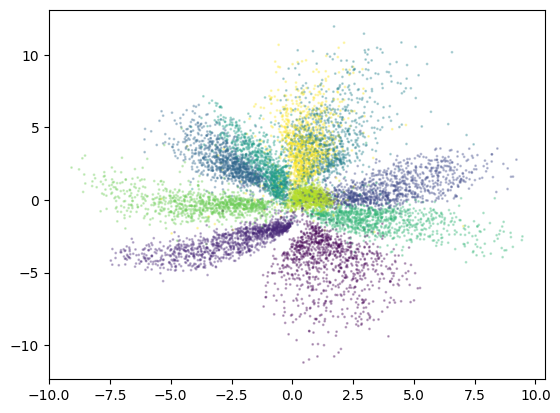

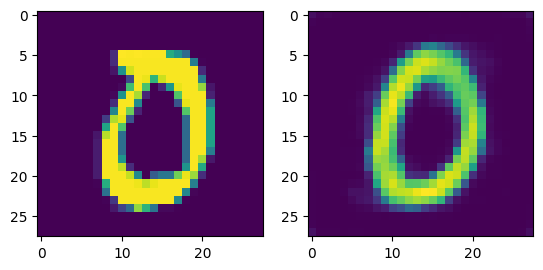

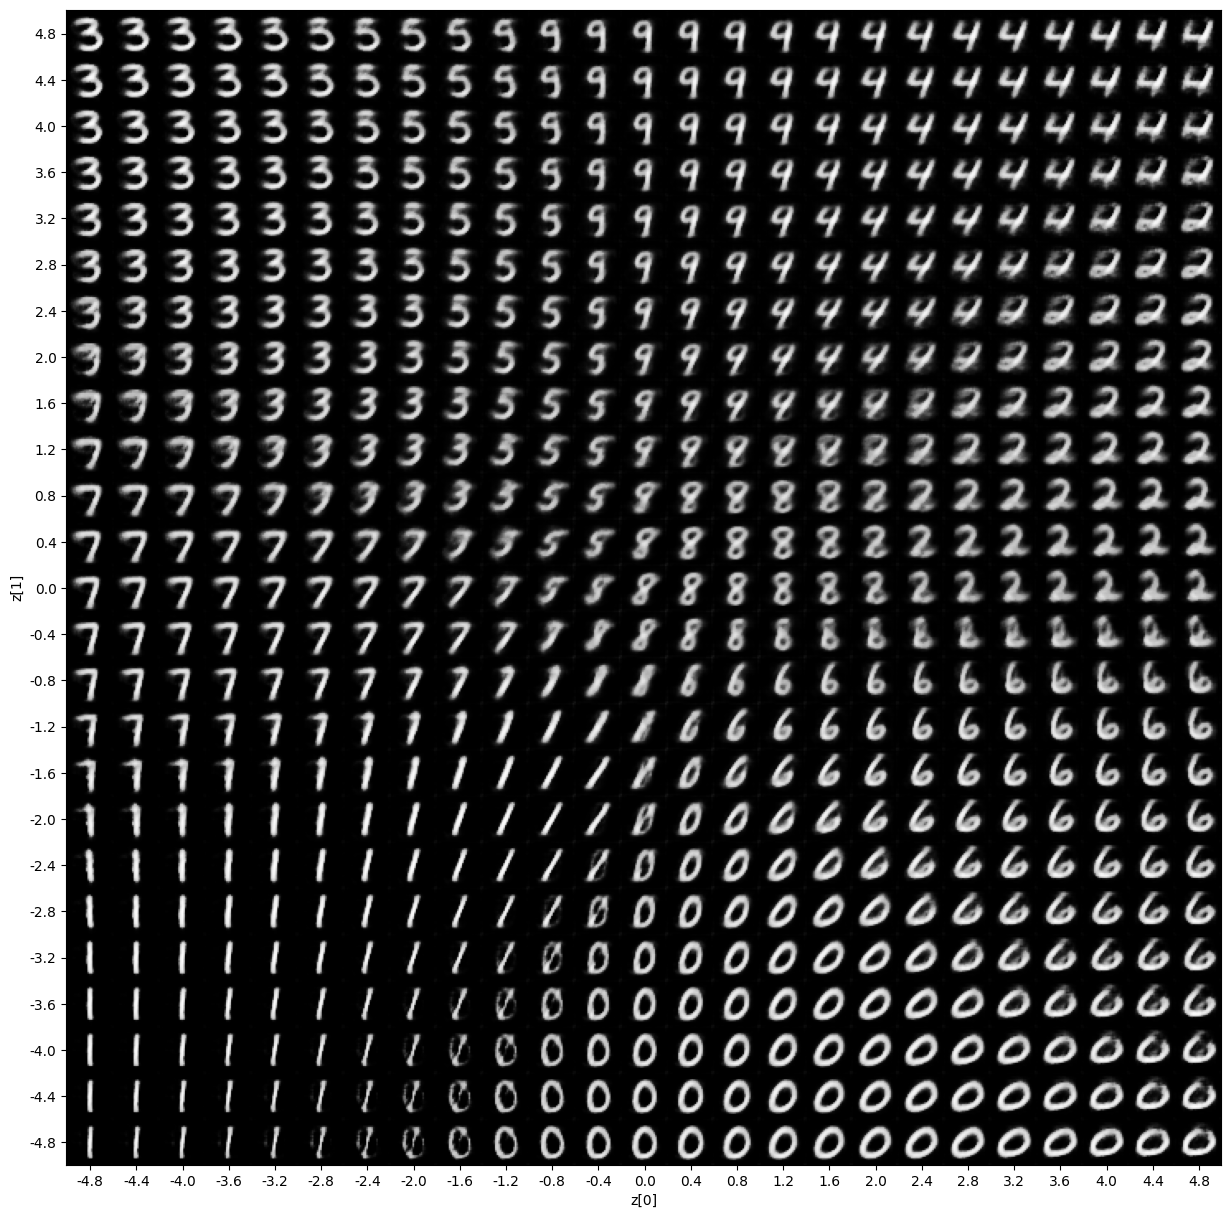

In [65]:
evaluate(with_classifier, x_test, y_test)

1/1 [==============================] - 0s 119ms/step
vars = array([[0.4696745 , 0.21970621]], dtype=float32)
1/1 [==============================] - 0s 28ms/step


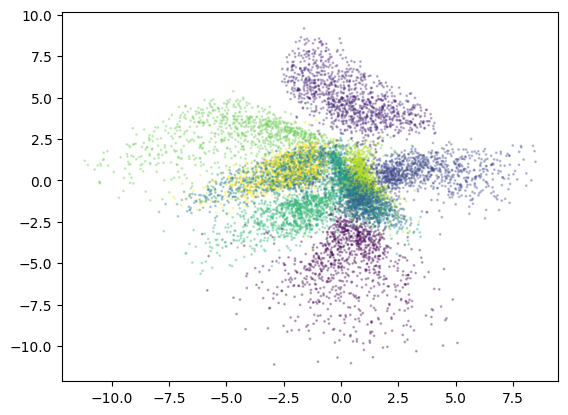

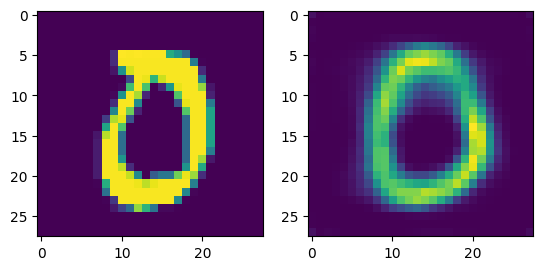

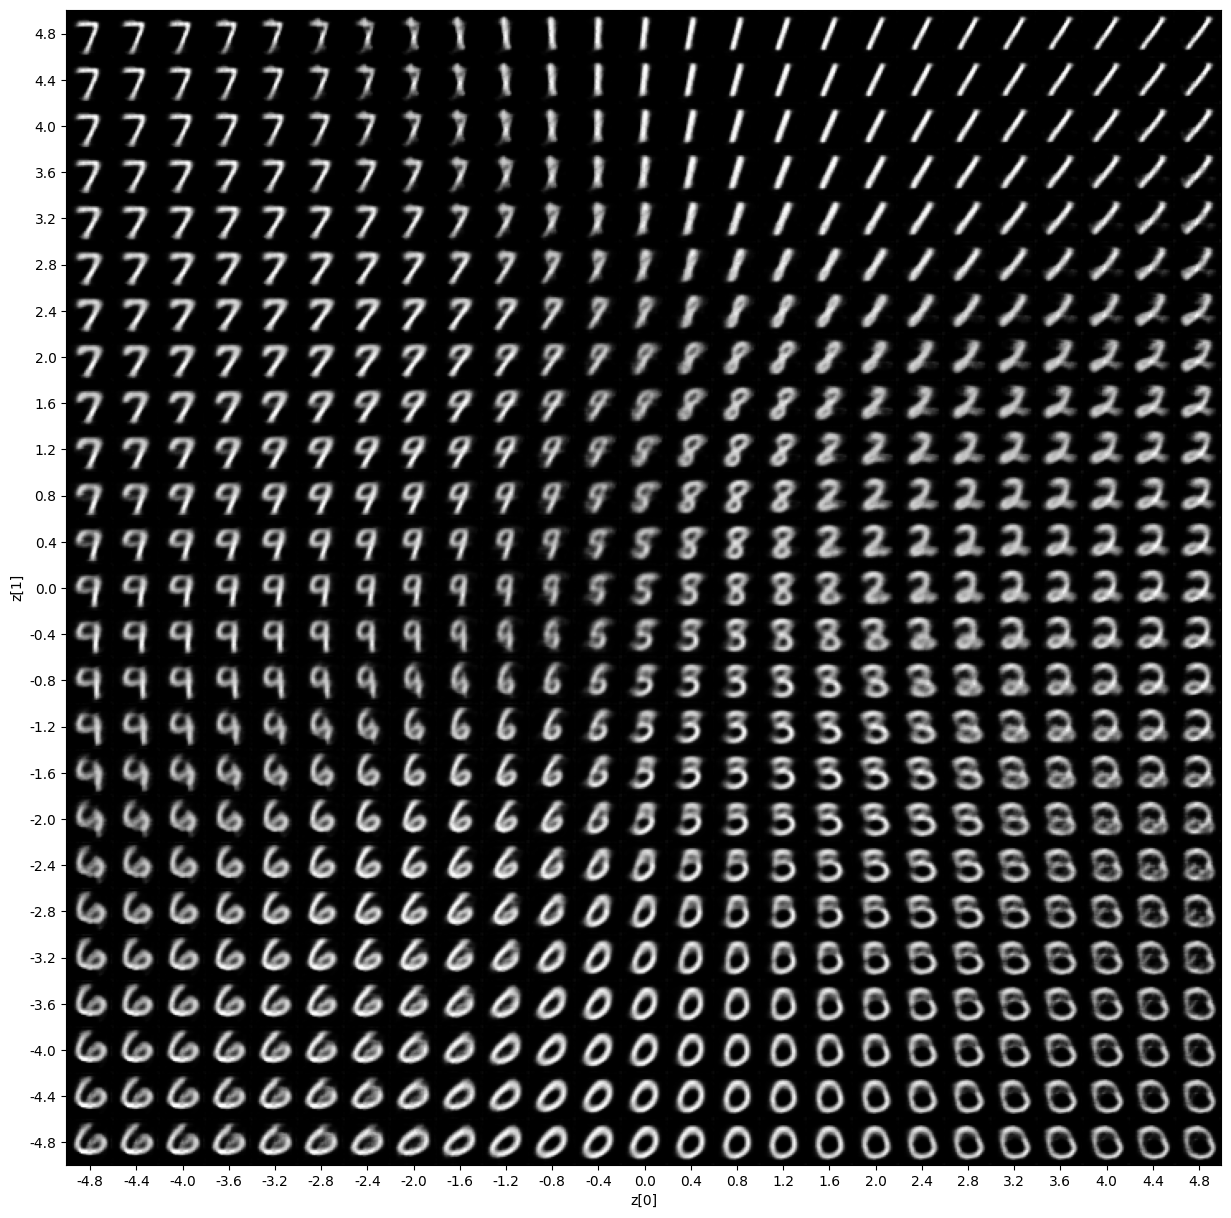

In [66]:
evaluate(without_classifier, x_test, y_test)